In [1]:
"""
    helm.model_dkps_analysis
"""

import argparse
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from rich import print as rprint



legalbench:subset=abercrombie-score-res.tsv


clipping DKPS columns to (0, 1) - ['p_null', 'p_sample', 'p_lr_dkps8__n_components_cmds=8__n_models=20', 
'p_lr_dkps8__n_components_cmds=8__n_models=50', 'p_lr_dkps8__n_components_cmds=8__n_models=ALL']

/tmp/ipykernel_375250/1973581699.py:81: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gain_model = df_res.groupby(['n_samples', 'target_model']).apply(lambda x: (x.e_sample - x.e_interp).mean()).reset_index(name='gain')


med_qa-score-res.tsv


clipping DKPS columns to (0, 1) - ['p_null', 'p_sample', 'p_lr_dkps8__n_components_cmds=8__n_models=20', 
'p_lr_dkps8__n_components_cmds=8__n_models=50', 'p_lr_dkps8__n_components_cmds=8__n_models=ALL']

/tmp/ipykernel_375250/1973581699.py:81: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gain_model = df_res.groupby(['n_samples', 'target_model']).apply(lambda x: (x.e_sample - x.e_interp).mean()).reset_index(name='gain')


math:subject=counting_and_probability-score-res.tsv


clipping DKPS columns to (0, 1) - ['p_null', 'p_sample', 'p_lr_dkps8__n_components_cmds=8__n_models=20', 
'p_lr_dkps8__n_components_cmds=8__n_models=50', 'p_lr_dkps8__n_components_cmds=8__n_models=ALL']

/tmp/ipykernel_375250/1973581699.py:81: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gain_model = df_res.groupby(['n_samples', 'target_model']).apply(lambda x: (x.e_sample - x.e_interp).mean()).reset_index(name='gain')


wmt_14:language_pair=ru-en-meteor-res.tsv


clipping DKPS columns to (0, 1) - ['p_null', 'p_sample', 'p_lr_dkps8__n_components_cmds=8__n_models=20', 
'p_lr_dkps8__n_components_cmds=8__n_models=50', 'p_lr_dkps8__n_components_cmds=8__n_models=ALL']

/tmp/ipykernel_375250/1973581699.py:81: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gain_model = df_res.groupby(['n_samples', 'target_model']).apply(lambda x: (x.e_sample - x.e_interp).mean()).reset_index(name='gain')


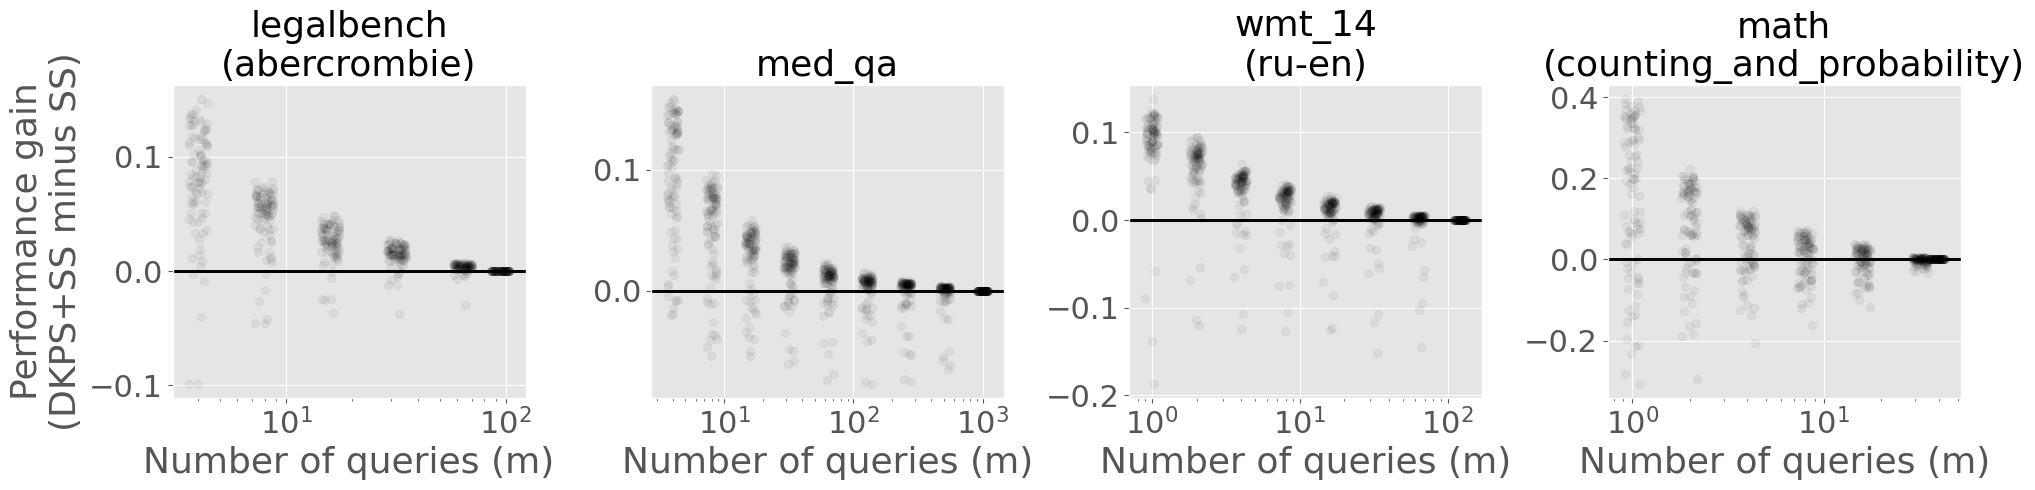

In [3]:
import os
plt.style.use('ggplot')

os.listdir('/home/user/helivan-project-generation/ep-dkps-results/results/')
score_col = 'score'
outdir = '/home/user/helivan-project-generation/ep-dkps-results/results/'
# plot_dir=Path('plots') / dataset.replace(':', '-')
# tsv_path = Path(outdir) / f'{dataset}-{score_col}-res.tsv'

fontsize=26
labelsize=22

keep_list = ['legalbench:subset=abercrombie', 'med_qa', 'wmt_14:language_pair=ru-en-meteor-res', 'math:subject=counting_and_probability']
method_label_dict = {
    'Sample Mean': 'Sample Score',
    'Population Mean': 'Pop. Mean',
    'DKPS(d=8, n_models=20)': 'DKPS (d=8, N=20)',
    'DKPS(d=8, n_models=50)': 'DKPS (d=8, N=50)',
    'DKPS(d=8, n_models=ALL)': 'DKPS (d=8, N=ALL)',
    'interp(e_sample+e_lr_dkps8)': '(1-m/M) DKPS + (m/M) Sample Score'
}

color_dict = {
    'Sample Mean': list(plt.rcParams['axes.prop_cycle'])[1]['color'],
    'Population Mean': list(plt.rcParams['axes.prop_cycle'])[3]['color'],
    'DKPS(d=8, n_models=20)': list(plt.rcParams['axes.prop_cycle'])[0]['color'],
    'DKPS(d=8, n_models=50)': list(plt.rcParams['axes.prop_cycle'])[0]['color'],
    'DKPS(d=8, n_models=ALL)': list(plt.rcParams['axes.prop_cycle'])[0]['color'],
    'interp(e_sample+e_lr_dkps8)': list(plt.rcParams['axes.prop_cycle'])[2]['color']
}


fig, axs = plt.subplots(1,4, figsize=(20,5))
for file in os.listdir('/home/user/helivan-project-generation/ep-dkps-results/results/'):
    if file[0] == '.':
        continue
    if file[-3:] != 'tsv':
        continue

    _keep = False
    for i, keep in enumerate(keep_list):
        if keep in file:
            _keep = True
            break

    if not _keep:
        continue
    print(file)

    dataset = file.split('-score-res')[0]
    dataset = dataset.split('-meteor-res')[0]
    plot_dir=Path('plots') / dataset.replace(':', '-')
    tsv_path = outdir + file

    df_res = pd.read_csv(tsv_path, sep='\t')
    model_names  = df_res.target_model.unique()
    n_replicates = df_res.seed.nunique()

    dkps_cols = [c for c in df_res.columns if 'p_' in c]
    rprint(f'[yellow]clipping DKPS columns to (0, 1) - {dkps_cols}[/yellow]')
    for c in dkps_cols:
        df_res[c] = df_res[c].clip(0, 1)

    for c in dkps_cols:
        df_res[c.replace('p_', 'e_')] = np.abs(df_res[c] - df_res.y_act)

    # alias the run with all models
    df_res['p_lr_dkps8'] = df_res['p_lr_dkps8__n_components_cmds=8__n_models=ALL']
    
    # compute interpolation
    max_samples        = df_res.n_samples.max()
    df_res['p_interp'] = (df_res.n_samples * df_res.p_sample + (max_samples - df_res.n_samples) * df_res.p_lr_dkps8) / max_samples
    df_res['e_interp'] = np.abs(df_res.p_interp - df_res.y_act)
    
    if any([xx in dataset for xx in ['med_qa', 'legalbench']]):
        df_res = df_res[df_res.n_samples > 2]
    
    # --
    # Plot gain (average per model)
    
    gain_model = df_res.groupby(['n_samples', 'target_model']).apply(lambda x: (x.e_sample - x.e_interp).mean()).reset_index(name='gain')
    ax=axs[i]
    for target_model in gain_model.target_model.unique():
        sub = gain_model[gain_model.target_model == target_model]
        ax.scatter(sub.n_samples * np.random.uniform(0.9, 1.1), sub.gain, label=target_model, alpha=0.05, c='black')
        ax.axhline(y=0, c='k', lw=2, alpha=0.25)
        
    ax.set_xscale('log')
    ax.set_xlabel('Number of queries (m)', fontsize=fontsize)
    ax.tick_params(labelsize=labelsize)

    title=dataset.replace(':', '\n')
    if '=' in title:
        title = title.split('\n')[0] + '\n' + f'({title.split('\n')[-1].split('=')[-1]})'
    ax.set_title(f'{title}', fontsize=fontsize)

    
axs[0].set_ylabel('Performance gain\n(DKPS+SS minus SS)', fontsize=fontsize)
plt.tight_layout()
plt.savefig('figures/fig3.pdf', bbox_inches='tight')